# Assignment 3.2

Irfan Nur Afif (1035476)

Timothy Aerts (0756341)

# Sequence classification model

In [1]:
from __future__ import print_function

## 1. Preprocess data

#### Tasks:

* Create word vocabulary index (use 10.000 most frequent words)
* Preprocess training and validation set for model input. Use vocabulary index as lookup dictionary to transform raw text into integer sequences. You may use code from Practical 5.

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import re
import nltk

import io as io
DATA_PATH = 'data'
EMBEDDING_PATH = 'embedding'
MODEL_PATH = 'model'


In [3]:

def striphtml(html):
    p = re.compile(r'<.*?>')
    return p.sub('', html)

def clean(s):
    return re.sub(r'[^\x00-\x7f]', r'', s)

train_data = pd.read_csv(os.path.join(DATA_PATH,"trainingData.tsv"), header=0, delimiter="\t")
valid_data = pd.read_csv(os.path.join(DATA_PATH,"validationData.tsv"), header=0, delimiter="\t")

train_docs = []
train_labels = []
for cont, sentiment in zip(train_data.review, train_data.sentiment):
    
    doc = clean(striphtml(cont))
    doc = doc.lower() 
    train_docs.append(doc)
    train_labels.append(sentiment)

valid_docs =[]
valid_labels = []
i=0
for docid,cont in zip(valid_data.id, valid_data.review):
    
    id_label = docid.split('_')
    # if rating >= 7, then assign 1 (positive sentiment) as label
    if(int(id_label[1]) >= 7):
        valid_labels.append(1)
    # else, assign 0 (negative sentiment) as label
    else:
        valid_labels.append(0)         
    doc = clean(striphtml(cont))
    doc = doc.lower() 
    valid_docs.append(doc)



In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
voc_length = 10000
tokenizer = Tokenizer(num_words=voc_length)
tokenizer.fit_on_texts(train_docs)
training_seq = tokenizer.texts_to_sequences(train_docs)
val_seq = tokenizer.texts_to_sequences(valid_docs)

C:\Users\timothy\Anaconda3\envs\recsys\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
#check if no other labels than 0,1 are present
print(set(train_labels),set(valid_labels))

{0, 1} {0, 1}


In [6]:
# provide model inputs (sequences from training and validation set) and outputs (sentiment labels)
max_len = 500

x_train = pad_sequences(training_seq,maxlen=max_len)[:12000]
y_train = np.array(train_labels)[:12000]
x_validation =  pad_sequences(val_seq,maxlen=max_len)[:2000]
y_validation = np.array(valid_labels)[:2000]

print(x_train.shape,y_train.shape)
print(x_validation.shape,y_validation.shape)

(12000, 500) (12000,)
(2000, 500) (2000,)


## 2. Sequence classification model

#### Tasks: 

* Create a RNN model to classify sequence of words on a binary classification task
* Compare four (4) different gate memory units
* Plot model performance (loss and accuracy) of these 4 models
* Present the performance (loss and accuarcy) of these 4 models in a comparison table

In [7]:
import keras
from keras.layers import Input, Embedding, LSTM, Dense, GRU,Dropout
from keras.models import Model
# decide number of epochs and batch_size

emb_length = 64



### Model 1 : LSTM

In [8]:
# YOUR CODE HERE
# MODEL-1: LSTM

# construct the model
nr_lstm = 64

sequence_input  =Input(shape=(max_len,),name='input_layer')
embedding_layer = Embedding(voc_length,128,input_length=500,name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
drop = Dropout(0.5)(embedded_sequences)
lstm_layer = LSTM(nr_lstm,name='lstm_layer')(drop)
output_layer = Dense(1,name='prediction_layer',activation='sigmoid')(lstm_layer)
lstm_model = Model(sequence_input,output_layer)
lstm_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________________________________
word_embedding (Embedding)   (None, 500, 128)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_layer (LSTM)            (None, 64)                49408     
_________________________________________________________________
prediction_layer (Dense)     (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


### Model 2: GRU

In [9]:
# YOUR CODE HERE
# MODEL-2: GRU
nr_gru = 64
# construct the model
sequence_input  =Input(shape=(max_len,),name='input_layer')
embedding_layer = Embedding(voc_length,128,input_length=500,name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
drop = Dropout(0.5)(embedded_sequences)
gru_layer = GRU(nr_gru,name='gru_layer')(drop)
output_layer = Dense(1,name='prediction_layer',activation='sigmoid')(gru_layer)
gru_model = Model(sequence_input,output_layer)
gru_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________________________________
word_embedding (Embedding)   (None, 500, 128)          1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
gru_layer (GRU)              (None, 64)                37056     
_________________________________________________________________
prediction_layer (Dense)     (None, 1)                 65        
Total params: 1,317,121
Trainable params: 1,317,121
Non-trainable params: 0
_________________________________________________________________


### Model 3 : Bidirectional LSTM

In [10]:
from keras.layers import Bidirectional
# MODEL-3: Bidirectional LSTM

# construct the model
sequence_input  =Input(shape=(max_len,),name='input_layer')
embedding_layer = Embedding(voc_length,128,input_length=500,name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
bilstm_layer = Bidirectional(LSTM(nr_lstm,name='bilstm_layer'),name='bidirectional')(embedded_sequences)
output_layer = Dense(1,name='prediction_layer',activation='sigmoid')(bilstm_layer)
bilstm_model  = Model(sequence_input,output_layer)
bilstm_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________________________________
word_embedding (Embedding)   (None, 500, 128)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
prediction_layer (Dense)     (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


### Model 4 : Bidirectional GRU

In [11]:
# YOUR CODE HERE
# MODEL-4: Bidirectional GRU

# construct the model
sequence_input  =Input(shape=(max_len,),name='input_layer')
embedding_layer = Embedding(voc_length,128,input_length=500,name='word_embedding')
embedded_sequences = embedding_layer(sequence_input)
bigru_layer = Bidirectional(GRU(nr_gru,name='bigru_layer'),name='bidirectional')(embedded_sequences)
output_layer = Dense(1,name='prediction_layer',activation='sigmoid')(bigru_layer)
bigru_model =  Model(sequence_input,output_layer)
bigru_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________________________________
word_embedding (Embedding)   (None, 500, 128)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               74112     
_________________________________________________________________
prediction_layer (Dense)     (None, 1)                 129       
Total params: 1,354,241
Trainable params: 1,354,241
Non-trainable params: 0
_________________________________________________________________


### Compile models

In [12]:
# YOUR CODE HERE 
# decide loss function, and optimizer
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# YOUR CODE HERE 
# decide loss function, and optimizer
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# YOUR CODE HERE 
# decide loss function, and optimizer
bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# YOUR CODE HERE 
# decide loss function, and optimizer
bigru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from keras.callbacks import History


#Runtime variables

result = {}
num_epochs = 4
batch_size = 50


### Train models

In [17]:
# YOUR CODE HERE 
# add callback history during the training stage of the model

lstm_history = History()
lstm_model.fit(x_train, y_train, validation_data=(x_validation, y_validation),epochs=num_epochs, batch_size=batch_size,callbacks=[lstm_history])

result['lstm'] = lstm_history.history

Train on 12000 samples, validate on 2000 samples
Epoch 1/4
12000/12000 [==============================] - 90s 8ms/step - loss: 0.5060 - acc: 0.7467 - val_loss: 0.3523 - val_acc: 0.8550
Epoch 2/4
12000/12000 [==============================] - 89s 7ms/step - loss: 0.3434 - acc: 0.8687 - val_loss: 0.3857 - val_acc: 0.8460
Epoch 3/4
12000/12000 [==============================] - 88s 7ms/step - loss: 0.2661 - acc: 0.8957 - val_loss: 0.4196 - val_acc: 0.8250
Epoch 4/4
12000/12000 [==============================] - 89s 7ms/step - loss: 0.1974 - acc: 0.9273 - val_loss: 0.3605 - val_acc: 0.8605


In [18]:
print(lstm_history.history)

{'loss': [0.5060115871950984, 0.3434326113512119, 0.26606479816449186, 0.1973864183295518], 'val_loss': [0.3523266468197107, 0.385720270127058, 0.4196437317878008, 0.36054690815508367], 'val_acc': [0.8549999952316284, 0.8459999978542327, 0.8249999925494194, 0.8604999899864196], 'acc': [0.7466666642576456, 0.8687499942878882, 0.8956666643420855, 0.9273333303630352]}


In [19]:
# YOUR CODE HERE 
# add callback history during the training stage of the model
gru_history = History()
gru_model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=num_epochs, batch_size=batch_size,callbacks=[gru_history])

result['gru'] = gru_history.history

Train on 12000 samples, validate on 2000 samples
Epoch 1/4
12000/12000 [==============================] - 81s 7ms/step - loss: 0.5086 - acc: 0.7316 - val_loss: 0.4092 - val_acc: 0.8120
Epoch 2/4
12000/12000 [==============================] - 81s 7ms/step - loss: 0.2665 - acc: 0.8930 - val_loss: 0.3291 - val_acc: 0.8765
Epoch 3/4
12000/12000 [==============================] - 81s 7ms/step - loss: 0.1988 - acc: 0.9232 - val_loss: 0.3472 - val_acc: 0.8650
Epoch 4/4
12000/12000 [==============================] - 81s 7ms/step - loss: 0.1356 - acc: 0.9527 - val_loss: 0.3729 - val_acc: 0.8685


In [20]:
# YOUR CODE HERE 
# add callback history during the training stage of the model
bilstm_history = History()
bilstm_model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=num_epochs, batch_size=batch_size,callbacks=[bilstm_history])

result['bilstm'] = bilstm_history.history

Train on 12000 samples, validate on 2000 samples
Epoch 1/4
12000/12000 [==============================] - 160s 13ms/step - loss: 0.4977 - acc: 0.7492 - val_loss: 0.3555 - val_acc: 0.8480
Epoch 2/4
12000/12000 [==============================] - 155s 13ms/step - loss: 0.2719 - acc: 0.8926 - val_loss: 0.3518 - val_acc: 0.8435
Epoch 3/4
12000/12000 [==============================] - 155s 13ms/step - loss: 0.1975 - acc: 0.9268 - val_loss: 0.3638 - val_acc: 0.8735
Epoch 4/4
12000/12000 [==============================] - 155s 13ms/step - loss: 0.1350 - acc: 0.9515 - val_loss: 0.3911 - val_acc: 0.8500


In [21]:
# YOUR CODE HERE 
# add callback history during the training stage of the model
bigru_history = History()
bigru_model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=num_epochs, batch_size=batch_size,callbacks=[bigru_history])
result['bigru'] = bigru_history.history

Train on 12000 samples, validate on 2000 samples
Epoch 1/4
12000/12000 [==============================] - 125s 10ms/step - loss: 0.4693 - acc: 0.7636 - val_loss: 0.3847 - val_acc: 0.8300
Epoch 2/4
12000/12000 [==============================] - 124s 10ms/step - loss: 0.2593 - acc: 0.8992 - val_loss: 0.3436 - val_acc: 0.8600
Epoch 3/4
12000/12000 [==============================] - 123s 10ms/step - loss: 0.1887 - acc: 0.9297 - val_loss: 0.3851 - val_acc: 0.8560
Epoch 4/4
12000/12000 [==============================] - 123s 10ms/step - loss: 0.1353 - acc: 0.9515 - val_loss: 0.4341 - val_acc: 0.8510


### Save models and weight parameters

In [23]:
# Save model
lstm_model.save('lstm_model.h5')
# Save trained weight parameters
lstm_model.save_weights('weights_lstm_model.hdf5')


In [24]:
# Save model
gru_model.save('gru_model.h5')
# Save trained weight parameters
gru_model.save_weights('weights_gru_model.hdf5')


In [25]:
# Save model
bilstm_model.save('bilstm_model.h5')
# Save trained weight parameters
bilstm_model.save_weights('weights_bilstm_model.hdf5')


In [26]:
# Save model
bigru_model.save('bigru_model.h5')
# Save trained weight parameters
bigru_model.save_weights('weights_bigru_model.hdf5')


#### Plot model performance (loss, accuracy)

Present two (2) plots for each model 

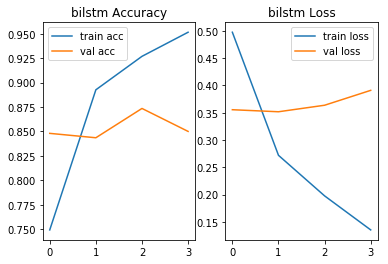

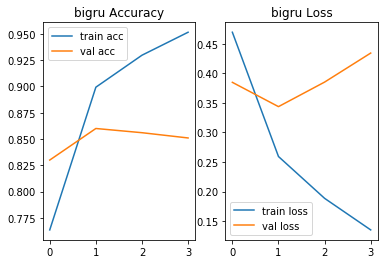

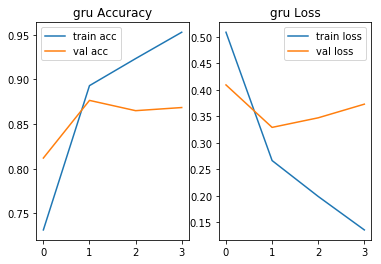

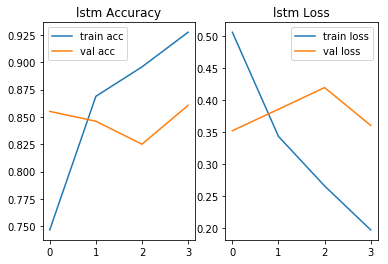

In [28]:
import matplotlib.pyplot as plt
for key,value in result.items():
    f,(ax1,ax2) = plt.subplots(1,2)
    ax1.plot(value['acc'],label='train acc')
    ax1.plot(value['val_acc'],label='val acc')
    ax1.set_title("{} Accuracy".format(key))
    ax1.legend()
    ax2.plot(value['loss'],label='train loss')
    ax2.plot(value['val_loss'],label='val loss')
    ax2.set_title("{} Loss".format(key))
    ax2.legend()
    plt.show()

In [42]:
tb = {}

for key,dt in result.items():
    tb[key] = {}
    for metric,value in dt.items():
        tb[key][metric+'_mean'] = np.mean(value)
        if 'loss' in metric:
            tb[key][metric+'_min'] = min(value)
        else:
            tb[key][metric+'_max'] = max(value)

table = pd.DataFrame(tb).T
table

,acc_max,acc_mean,loss_mean,loss_min,val_acc_max,val_acc_mean,val_loss_mean,val_loss_min
bigru,0.951500,0.886000,0.263148,0.135287,0.8600,0.849250,0.386874,0.343610
bilstm,0.951500,0.880021,0.275527,0.135043,0.8735,0.853750,0.365543,0.351800
gru,0.952750,0.875146,0.277372,0.135622,0.8765,0.855500,0.364591,0.329084
lstm,0.927333,0.859604,0.328224,0.197386,0.8605,0.846625,0.379559,0.352327


#### Present table comparison of model performance

#### Answer:

=== write your answer here ===

the Gru model seems to be the best performer. The validation accuracy is the highest between the models and the accuracy on the training set is the top performer as well. The high training accuracy might be a give away for overfitting, but to achieve better generalization a dropout layer has been added to the model. Therefore it feels reasonably safe to take the gru model.

### 3. Feature extraction

#### Tasks: 

* Choose one model with the best performance and use the model to produce ”neural codes” (document embedding) of raw text (5000 instances of unseen validation set) from RNN layer.
*  Use tSNE to reduce the dimension of extracted text features (encoded version of 5000 documents) into two (2) dimensions and visualize it towards their sentiment labels.


In [45]:
# load the trained model
from keras.models import load_model

# YOUR CODE HERE
# choose the best model

model = load_model('gru_model.h5')
model.load_weights('weights_gru_model.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________________________________
word_embedding (Embedding)   (None, 500, 128)          1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
gru_layer (GRU)              (None, 64)                37056     
_________________________________________________________________
prediction_layer (Dense)     (None, 1)                 65        
Total params: 1,317,121
Trainable params: 1,317,121
Non-trainable params: 0
_________________________________________________________________


#### Produce Neural codes of text reviews

In [56]:
# YOUR CODE HERE
start = 2000
end = 7000
x_unseen = pad_sequences(val_seq,maxlen=max_len)[start:end]
y_unseen = np.array(valid_labels)[start:end]
# define sub model to retrieve "neural codes" (document embedding) from recurrent layer
encoder_model = Model(input=model.input,output=model.get_layer('gru_layer').output)

encoder_model.summary()
# generate "neural codes" (document embedding) from the model
doc_embedding = encoder_model.predict(x_unseen)
#print(doc_embedding[0].shape)

C:\Users\timothy\Anaconda3\envs\recsys\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("gr..., inputs=Tensor("in...)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 500)               0         
_________________________________________________________________
word_embedding (Embedding)   (None, 500, 128)          1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
gru_layer (GRU)              (None, 64)                37056     
Total params: 1,317,056
Trainable params: 1,317,056
Non-trainable params: 0
_________________________________________________________________
(64,)


#### tSNE visualization

In [60]:
# YOUR CODE HERE
from sklearn.manifold import TSNE
# use tSNE to plot document embedding on its sentiment label

tsne = TSNE()
doc_embedding_2d = tsne.fit_transform(doc_embedding)



TypeError: scatter() missing 1 required positional argument: 'y'

5000 5000


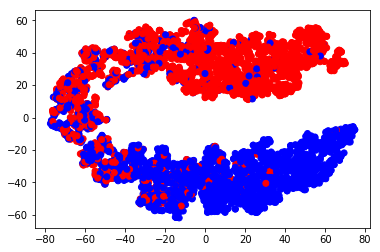

In [102]:
x,y = doc_embedding_2d[:,:1], doc_embedding_2d[:,1:2]

print(len(x),len(y))
color = {1:'r',0:'b'}
col = [color[x] for x in y_unseen]
  

plt.scatter(x,y,color=col,label=col)



### 4. One shot learning on multi-class classification

#### Tasks: 

* Use the RNN model that has been trained on binary classification task to extract features from different data set (Amazon product reviews)
* Define and implement an approach to assign labels on unlabelled set of reviews, by using the concept of "one shot learning"
* Compute accuracy, given ground truth labels
* Discuss the results 

Explain how the approach works.


#### Answer:

The idea is to encode the reviews with the same encoder as in the previous question.
The encoder there was able to distuinguis between positive and negative reviews and thus had some "understanding" of the review.
This encoding can then be used to encode the text reviews from amazon. For this data set we have 3 examples known and thus we can encode those. We can then encode the unseen data and compare distances between the vectors. The idea is that the closer the vector is to one of the examples the more likely it is to be that specific label. 

In [176]:
from sklearn.metrics.pairwise import cosine_similarity

# one shot learning task

labeled = pd.read_csv('D:/recsys/assignment3/example1_labelled.tsv',delimiter='\t')
unlabeled = pd.read_csv('D:/recsys/assignment3/example2_unlabelled.tsv',delimiter='\t')

reviews = tokenizer.texts_to_sequences(labeled['review'])
reviews =  pad_sequences(reviews,maxlen=max_len)

labels = labeled['label']
n_codes = encoder_model.predict(reviews)
lookup = {}

for i in range(len(n_codes)):
    lookup[labels[i]] = n_codes[i]

    
oneshot_review = tokenizer.texts_to_sequences(unlabeled['review'])
oneshot_review = pad_sequences(oneshot_review,maxlen=max_len)

preds = encoder_model.predict(oneshot_review)

distance = []
labels = []

for pred in preds:
    distances = {}
    max_score = -1
    label = ''
    for key,value in lookup.items():
        sim = cosine_similarity(pred.reshape(1,-1),value.reshape(1,-1))
        distances[key] = sim
        if sim > max_score:
            max_score = sim
            label = key
    labels.append(label)
    distance.append(distances)

unlabeled['predicted_label'] = labels

# compute overall accuracy, given ground truth labels
compare_labels = pd.read_csv('D:/recsys/assignment3/example2_labelled.tsv',delimiter='\t')
compare_labels['predicted'] = labels
compare_labels['correct'] =compare_labels['label']==compare_labels['predicted']
counts = compare_labels['correct'].value_counts()
accuracy = counts[1]/(counts[1]+counts[0])
print(accuracy)

0.14285714285714285


Discuss the result. Why it works -- or why it does not work.

#### Answer:

accuracy is very poor in this case.
Most likely this is due to the fact that the encoding for sentiment analysis looks at different types of words than would be required for the label analysis. 
The first issue is that the descriptive words for the labels like laptop, phone etc might not be in the vocabulary from the sentiment analysis.
The second issue is that the sentiment analysis will be looking for words like excellent, good, bad. It is looking for descriptive words which determine if the movie according to a review was good or bad. This would translate to the product quality more than to the label. Thus a bad laptop would have closer proximity to a bad phone than to a good laptop. where bad and good are ofcourse opinions fromt he authors.

